In [4]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Keep small subset if needed
df = df.sample(1000, random_state=42)

# Drop customerID
df.drop('customerID', axis=1, inplace=True)

Random Forest Accuracy: 0.795


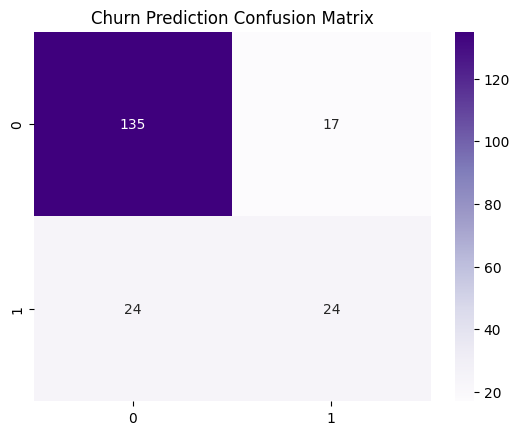

In [5]:
# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, pred))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Purples')
plt.title("Churn Prediction Confusion Matrix")
plt.show()

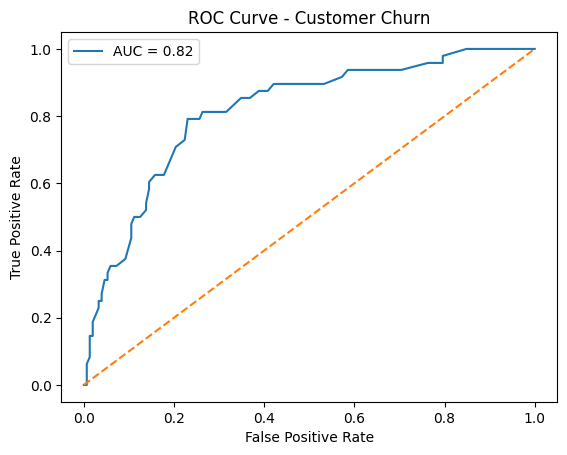

In [6]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob = rf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Customer Churn")
plt.legend()
plt.show()